# Praktika: Decision Tree

Erabili beharreko datu-bilduma izanda, DataFrame formatuan kargatu

In [6]:
## importak

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
import numpy as np
import os
from sklearn.decomposition import PCA

In [7]:
## datu bilduma kargatu

df = pd.read_csv('train.csv')
df.head()


,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
0,1,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,2,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,3,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up
3,4,male,49,yes,138.79,6.80,medium,oral,31.67,11.91,50.81,0.61,4.79,1.23,up
4,5,male,65,no,128.42,4.01,low,insulin,28.50,5.72,65.95,1.16,7.68,0.62,steady


## 0. Ariketa: Datu azterketa

Hurrengo datu-bildumak, zein datu mota ditu. Aztertu datuak grafikoki, klase desbideraketa, dimentsioak, ...

In [8]:
# datu azterketa
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['family_history'] = le.fit_transform(df['family_history'])
df['food_intake'] = le.fit_transform(df['food_intake'])
df['previous_medications'] = le.fit_transform(df['previous_medications'])
df['Insulin'] = le.fit_transform(df['Insulin'])

df.head()

# gender: male 1 female 0
# family_history: yes 1 no 0
# food_intake: high 0 medium 2 low 1
# previous_medications: none 2 insulin 1 oral 3 both 0
# Insulin: up 3 no 1 steady 2 down 0

def test (df, ehuneko=0.2):
    tamaina = len (df)
    test_tamaina = int (tamaina * ehuneko)
    df_test = df[:test_tamaina]
    df_train = df[test_tamaina:]
    return df_train, df_test

In [ ]:
train_df, test_df = test(df)

# Klaseak banatu
y_train = train_df['Insulin']
y_test = test_df['Insulin']

# Ezabatu klaseak datasetatik
train_df.drop(columns=['Insulin', 'patient_id'], inplace=True)
test_df.drop(columns=['Insulin', 'patient_id'], inplace=True)

train_df.head()

C:\Users\eneko\AppData\Local\Temp\ipykernel_25168\1406438600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['Insulin', 'patient_id'], inplace=True)
C:\Users\eneko\AppData\Local\Temp\ipykernel_25168\1406438600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['Insulin', 'patient_id'], inplace=True)


,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine
2000,1,67,1,160.61,9.72,0,0,21.99,7.17,43.29,1.18,6.34,1.09
2001,0,32,0,108.28,1.48,2,1,18.85,9.37,111.94,0.79,9.60,1.13
2002,0,53,1,141.32,3.95,1,2,20.20,9.32,102.09,1.34,6.37,1.23
2003,0,66,0,152.42,6.65,2,3,35.29,6.47,42.92,1.36,6.68,1.37
2004,0,22,0,146.58,3.05,0,1,37.84,5.51,88.86,1.01,4.37,1.32


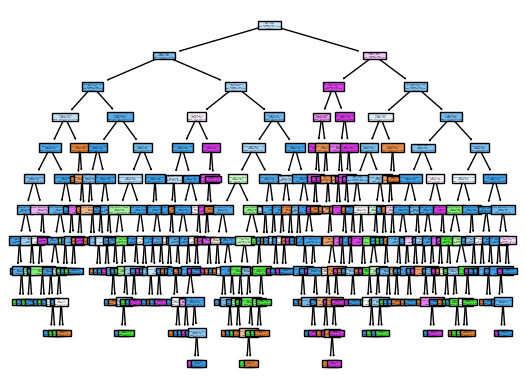

In [11]:
# train test

clf = tree.DecisionTreeClassifier(random_state=2)
clf = clf.fit(train_df, y_train)

plot_tree(clf,filled=True, impurity=True,
               class_names=[str(i) for i in sorted(y_train.unique())], 
               feature_names=df.columns,
            )

plt.savefig('decision_tree.pdf',format='pdf')

## 1. Ariketa: modeloa sortu eta ebaluatu

Erabaki zuhaitzak algoritmoa erabili sailkapen modeloa sortzeko

In [12]:
y_test

0       2
1       3
2       3
3       3
4       2
       ..
1995    2
1996    3
1997    0
1998    2
1999    2
Name: Insulin, Length: 2000, dtype: int64

In [13]:
# algoritmoa

# Insulin: up 3 no 1 steady 2 down 0

predicted_values = clf.predict(test_df)
predicted_values

array([2, 3, 3, ..., 0, 2, 2], shape=(2000,))

Lortutako emaitzak nahasmen matrizea erabiliz irudikatu eta ebaluatu F1 ebaluazio neurria erabiliz

[Text(0, 0.5, 'down'),
 Text(0, 1.5, 'no'),
 Text(0, 2.5, 'steady'),
 Text(0, 3.5, 'up')]

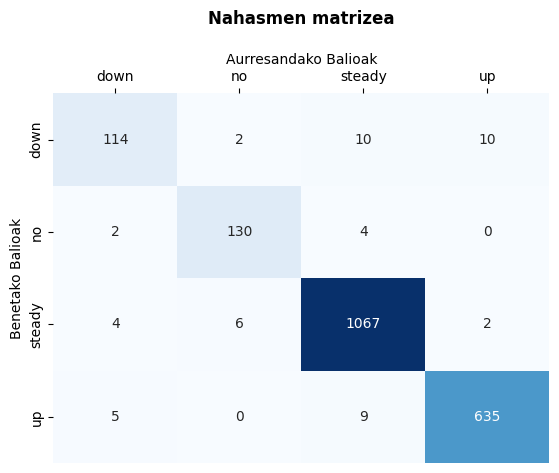

In [ ]:
# nahasmen matrizea

real_values = y_test
predicted_values = predicted_values

cm = confusion_matrix(real_values, predicted_values)

# Erakutsi matrizea

ax2= sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
)

ax2.set_title('Nahasmen matrizea\n', fontweight="bold")

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Aurresandako Balioak')
ax2.set_ylabel('Benetako Balioak')

ax2.xaxis.set_ticklabels(['down','no', 'steady', 'up'])
ax2.yaxis.set_ticklabels(['down','no', 'steady', 'up'])


In [29]:
# Batez besteko puntuazioa klase bakoitzeko F1

f1_macro = f1_score(real_values, predicted_values, average='macro')
print(f"F1 (macro): {f1_macro:.4f}")


F1 (macro): 0.9466


In [ ]:
# Metrika globala TP, FP, TN eta FN totalak erabiliz

f1_micro = f1_score(real_values, predicted_values, average='micro')
print(f"F1 (micro): {f1_micro:.4f}")

F1 Score (micro): 0.9730


## 2. Ariketa: Dimentsio murrizketa

PCA erabiliz, modeloa 6 dimentsiora murriztu eta berriro ere erabaki zuhaitza erabiliz lortutako emaitzak nahasmen matrizean irudikatu eta F1 neurriarekin ebaluatu.


Ondorioak atera

In [17]:
# Dimentsio murrizketa

# 1. Crear el objeto PCA con 6 componentes
pca = PCA(n_components=6)

# 2. Ajustar PCA con los datos de entrenamiento y transformar
train_df_pca = pca.fit_transform(train_df)

# 3. Transformar también los datos de test
test_df_pca = pca.transform(test_df)

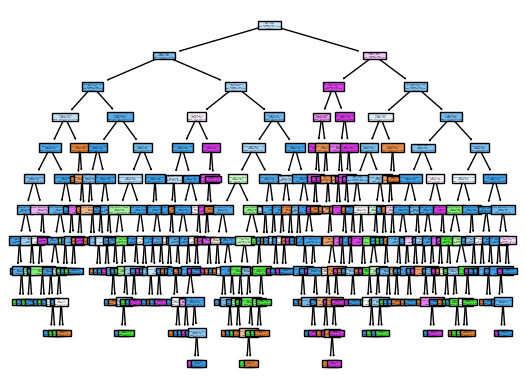

In [ ]:
# modelo sorrera

# Entrenatu modeloa
clf_pca = tree.DecisionTreeClassifier(random_state=2)
clf_pca = clf_pca.fit(train_df_pca, y_train)

plot_tree(clf,filled=True, impurity=True,
               class_names=[str(i) for i in sorted(y_train.unique())], 
               feature_names=df.columns,
            )

plt.savefig('decision_tree_pca.pdf',format='pdf')

# Testa egin PCArekin
predicted_values_pca = clf_pca.predict(test_df_pca)


F1 Score (macro) PCA: 0.3304
F1 Score (micro) PCA: 0.4560

--- KONPARAKETA ---
F1 macro SPCA: 0.9466
F1 macro PCA gabe: 0.3304
Desberdintasuna: 0.6161


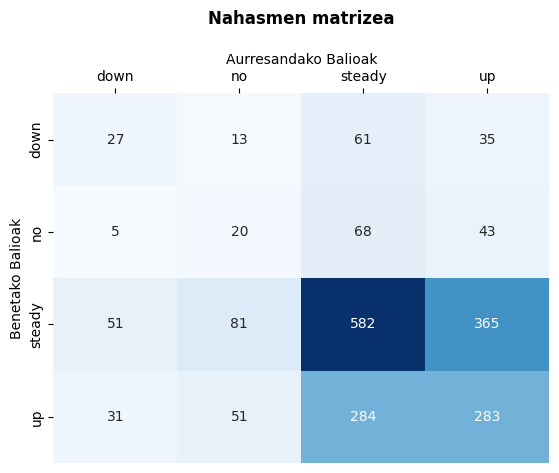

In [ ]:
# modelo ebaluazioa

cm_pca = confusion_matrix(real_values, predicted_values_pca)

# Erakutsi matrizea 
ax2= sns.heatmap(
    cm_pca,
    annot=True,
    fmt="d",
    cmap='Blues',
    cbar=False,
)

ax2.set_title('Nahasmen matrizea\n', fontweight="bold")

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Aurresandako Balioak')
ax2.set_ylabel('Benetako Balioak')

ax2.xaxis.set_ticklabels(['down','no', 'steady', 'up'])
ax2.yaxis.set_ticklabels(['down','no', 'steady', 'up'])

# F1 
f1_macro_pca = f1_score(y_test, predicted_values_pca, average='macro')
f1_micro_pca = f1_score(y_test, predicted_values_pca, average='micro')

print(f"\nF1 Score (macro) PCA: {f1_macro_pca:.4f}")
print(f"F1 Score (micro) PCA: {f1_micro_pca:.4f}")

# Konparaketa
print("\n--- KONPARAKETA ---")
print(f"F1 macro SPCA: {f1_macro:.4f}")
print(f"F1 macro PCA gabe: {f1_macro_pca:.4f}")
print(f"Desberdintasuna: {f1_macro - f1_macro_pca:.4f}")

## Zure ondorioak:

Zein modelo da hobea eta zergatik?

## Identifikatutako Abantailak eta Desabantailak

### Jatorrizko ereduaren abantailak:
- **Doitasun bikaina**: %94,7ko F1-macro balioak eredu oso sendoa dela adierazten du
- **Diskriminazio-ahalmen osoa**: Informazio guztia erabiltzen du eskuragarri dagoena
- **Erabilgarria aplikazio kritikoetarako**, non doitasuna lehenetsi behar den

### PCArekin ereduaren abantailak:
- **Konputazio-sinpletasuna**: Entrenamendu-denbora laburragoa
- **Dimentsio-murrizketa**: 13 ezaugarritatik 6ra murrizten ditu
- **Overfitting-arrisku teoriko txikiagoa** (nahiz eta hemen underfittinga arazo handiagoa den)

## Ondorioa
Ez da PCA erabiltzea gomendatzen arazo zehatz honetarako. Galera (%65,1a) oso handia da edozein aplikazio praktikorentzat, eta gehiagi kontuan hartua arlo medikoan oinarrituta dagoela.